In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import math
FUTURE_CODES = [chr(ord('A') + i) for i in range(14)] # Suffix of monthly future code
CONTRACTS = ['SBL'] +  ['LBS' + c for c in FUTURE_CODES]

In [3]:
futures_2020 = pd.read_csv('xchange/data/case1/futures_2020_clean.csv').drop('Unnamed: 0', axis=1)
futures_2021 = pd.read_csv('xchange/data/case1/futures_2021_clean.csv').drop('Unnamed: 0', axis=1)

weather_2020 = pd.read_csv('xchange/data/case1/weather_2020.csv').drop('Unnamed: 0', axis=1)
weather_2021 = pd.read_csv('xchange/data/case1/weather_2021.csv').drop('Unnamed: 0', axis=1)


futures_2022 = pd.read_csv('xchange/data/case1/futures_2022.csv').drop('Unnamed: 0', axis=1)
weather_2022 = pd.read_csv('xchange/data/case1/weather_2022.csv').drop('Unnamed: 0', axis=1)


futures_2022

,LBSA,LBSB,LBSC,LBSD,LBSE,LBSF,LBSG,LBSH,LBSI,LBSJ,LBSK,LBSL,LBSM,LBSN,SBL
0,55.156256,55.458426,55.761101,56.064280,56.367966,56.672157,56.976856,57.282064,57.587780,57.894007,58.200744,58.507993,58.815754,59.124029,54.854589
1,55.229113,55.531405,55.834201,56.137502,56.441309,56.745623,57.050445,57.355775,57.661615,57.967964,58.274825,58.582197,58.890082,59.198481,54.941683
2,55.342782,55.645264,55.948250,56.251741,56.555739,56.860244,57.165257,57.470779,57.776810,58.083352,58.390405,58.697970,59.006048,59.314640,55.069542
3,54.733209,55.034674,55.336642,55.639113,55.942089,56.245570,56.549558,56.854052,57.159055,57.464566,57.770587,58.077119,58.384161,58.691716,54.475210
4,54.540254,54.841397,55.143042,55.445191,55.747843,56.051001,56.354664,56.658833,56.963510,57.268695,57.574389,57.880593,58.187308,58.494535,54.296839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,51.915192,52.211957,52.509216,52.806971,53.105223,53.403972,53.703219,54.002966,54.303213,54.603961,54.905210,55.206962,55.509217,55.811976,55.135070
248,51.337130,51.632930,51.929224,52.226011,52.523294,52.821073,53.119348,53.418121,53.717392,54.017162,54.317433,54.618204,54.919477,55.221253,54.560876
249,51.329898,51.625686,51.921967,52.218743,52.516013,52.813780,53.112043,53.410803,53.710062,54.009821,54.310079,54.610838,54.912098,55.213862,54.567841
250,50.973851,51.269045,51.564731,51.860911,52.157585,52.454753,52.752417,53.050578,53.349236,53.648392,53.948048,54.248203,54.548859,54.850016,54.219595


In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(weather_2022, label = 'Weather')
for contract in CONTRACTS:
    plt.plot(futures_2022[str(contract)], label = str(contract))
plt.legend()
plt.show()                                                                                                                      




Let's build relationship b/t SBL (soybean) and Contract and Weather Index!

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(futures_2020, weather_2020)
plt.scatter(futures_2021, weather_2021)
plt.xlabel('SBL price')
plt.ylabel('Weather Index')
plt.title('2y Outlook')

Contract to SBL
- appears to be linear
- overall same slope, could indicate sth


In [1]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(futures_2022['LBSA']) 
plt.plot(futures_2022['SBL'])
plt.xlabel('Trading Day')
plt.ylabel('Price')

###########################
#Regression
LBSA_SBL_reg = scipy.stats.linregress(futures_2022['LBSA'],futures_2022['SBL'])

##########################

plt.subplot(1,2,2)
plt.scatter(futures_2022['LBSA'], futures_2022['SBL'])
plt.plot(futures_2022['LBSA'], LBSA_SBL_reg.intercept + LBSA_SBL_reg.slope*futures_2022['LBSA'], 'r', label='LBSA_SBL_reg')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#Regression
for i in range(ord("A"), ord("N")+1):
    reg = scipy.stats.linregress(futures_2022['SBL'], futures_2022['LBS' + str(chr(i))])
#    plt.plot(futures_2022['LBS'+str(chr(i))], reg.intercept + reg.slope*futures_2022['LBS'+ str(chr(i))], 'r', label='LBS' + str(chr(i))+ '_SBL_reg')
    print('LBS' + str(chr(i)) + "_SBL_reg intercept:", reg.intercept)
    print('LBS' + str(chr(i)) + "_SBL_reg slope:", reg.slope)
    print(f"R-squared: {reg.rvalue**2:.6f}")
    print()


Contract to Weather Index

In [ ]:
#Regression
for i in range(ord("A"), ord("N")+1):
    reg = scipy.stats.linregress(weather_2022["weather"], futures_2022['LBS' + str(chr(i))])
#    plt.plot(futures_2022['LBS'+str(chr(i))], reg.intercept + reg.slope*futures_2022['LBS'+ str(chr(i))], 'r', label='LBS' + str(chr(i))+ '_SBL_reg')
    print('LBS' + str(chr(i)) + "_Weather intercept:", reg.intercept)
    print('LBS' + str(chr(i)) + "_Weather slope:", reg.slope)
    print(f"R-squared: {reg.rvalue**2:.6f}")
    print()

SBL to Weather Index (2020) (1-day delayed)

In [ ]:
P = futures_2020.to_numpy()[1:]
W = weather_2020.to_numpy()[:-1]

reg = scipy.stats.linregress(W.flatten(),P.flatten())
print(f'SBL_Weather intercept:', reg.intercept)
print(f'SBL_Weather slope:', reg.slope)
print(f"R-squared: {reg.rvalue**2:.6f}")

In [ ]:
#Testing Delay 2020
r_sq = []
for delay in range(1,126):
    Price = futures_2020.to_numpy()[delay:]
    Weather = weather_2020.to_numpy()[:-delay]
    reg = scipy.stats.linregress(Weather.flatten(), Price.flatten())
    rvalue = (reg.rvalue**2)
    r_sq.append(rvalue)

print(r_sq.index(max(r_sq)), max(r_sq))

SBL to Weather Index (2021) (1-day delayed)

SBL_Weather intercept: 54.88051236075176
SBL_Weather slope: 1.6622166004815064
R-squared: 0.695449


Text(0.5, 0, 'Day')

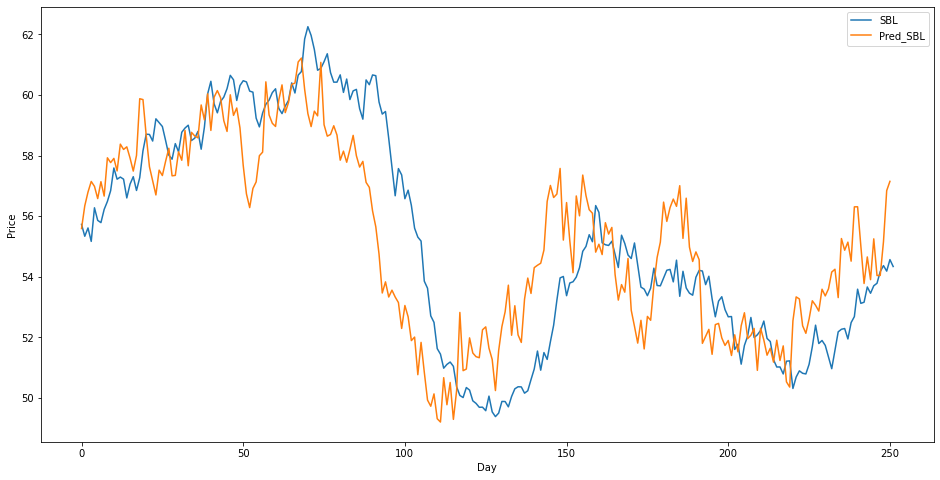

In [202]:
P2 = futures_2021.to_numpy()[1:]
W2 = weather_2021.to_numpy()[:-1]

reg = scipy.stats.linregress(W2.flatten(),P2.flatten())
pred_SBL = [reg.intercept + reg.slope * index for index in W2]

print(f'SBL_Weather intercept:', reg.intercept)
print(f'SBL_Weather slope:', reg.slope)
print(f"R-squared: {reg.rvalue**2:.6f}")

plt.figure(figsize=(16,8))
plt.plot(futures_2021, label = 'SBL')
plt.plot(pred_SBL, label = "Pred_SBL")
plt.legend()
plt.ylabel('Price')
plt.xlabel('Day')


In [ ]:
#Testing Delay 2021
r_sq = []
for delay in range(1,126):
    Price = futures_2021.to_numpy()[delay:]
    Weather = weather_2021.to_numpy()[:-delay]
    reg = scipy.stats.linregress(Weather.flatten(), Price.flatten())
    rvalue = (reg.rvalue**2)
    r_sq.append(rvalue)

print(r_sq.index(max(r_sq)), max(r_sq))


SBL_Weather intercept: 55.05929359983526
SBL_Weather slope: 1.471383386818419
R-squared: 0.758018


Text(0.5, 0, 'Day')

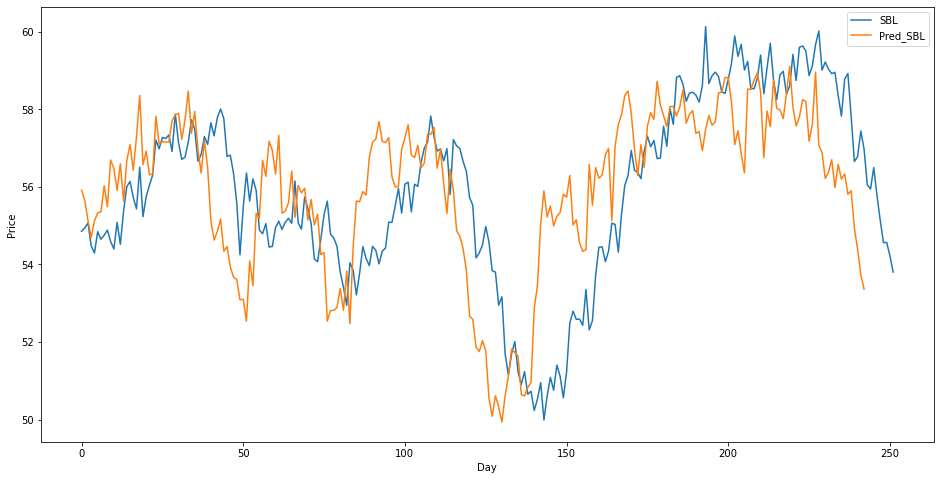

In [200]:

P3 = futures_2022['SBL'].to_numpy()[9:]
W3 = weather_2022.to_numpy()[:-9]

reg = scipy.stats.linregress(W3.flatten(), P3.flatten())
pred_SBL = [reg.intercept + reg.slope * index for index in W3]

print(f'SBL_Weather intercept:', reg.intercept)
print(f'SBL_Weather slope:', reg.slope)
print(f"R-squared: {reg.rvalue**2:.6f}")


plt.figure(figsize=(16,8))
plt.plot(futures_2022['SBL'], label = 'SBL')
plt.plot(pred_SBL, label = "Pred_SBL")
plt.legend()
plt.ylabel('Price')
plt.xlabel('Day')


#Perhaps delay messed up? 

In [201]:
#Testing Delay 2022
r_sq = []
for delay in range(1,126):
    Price = futures_2022['SBL'].to_numpy()[delay:]
    Weather = weather_2022.to_numpy()[:-delay]
    reg = scipy.stats.linregress(Weather.flatten(), Price.flatten())
    rvalue = (reg.rvalue**2)
    r_sq.append(rvalue)

print(r_sq.index(max(r_sq)), max(r_sq))


8 0.7580182121647326


Pricing Futures 

The price of a futures contract is the spot price of an underlying asset, adjusted for interest, time, paid out dividends, cost to carry, etc. The variance between the spot price and futures price forms the ‘basis of spread.’ The spread is the maximum at the beginning of the series but converges towards the settlement date (in our case future prob worth less as get closer to expiry since we have cost of carry).

F0 = S0exp((r+u-q-y)T)

r: risk-free rate
u: cost to carry (in percentage)
q & y are div and convience yield, not imp
T: Time to expiry, as frac of year

In [ ]:
DAILY_INTEREST_RATE = ((1+0.02)**(252**-1))-1

def futures_pricer(spot, expiry):
    return spot*(math.e ** (((DAILY_INTEREST_RATE)+(0.1/(spot))*(expiry))))
    
LBSA_Pred= []
count = 0 
for spot in futures_2022['SBL']:
    if count < 21:
        expiry = (21-count)/252
        prediction = futures_pricer(spot, expiry)
        LBSA_Pred.append(prediction)
        count += 1
    else:
        expiry = (252+ 21 - count)/252
        prediction = futures_pricer(spot, expiry)
        LBSA_Pred.append(prediction)
        count += 1
plt.figure(figsize=(16,8))
plt.subplot(1,1,1)
plt.plot(futures_2022['LBSA'], label = 'LBSA')
plt.plot(LBSA_Pred, label = 'LBSA_Pred')
plt.legend()
plt.title('LBSA v. LBSA Pred')



In [ ]:
DAILY_INTEREST_RATE = ((1+0.02)**(252**-1))-1
FUTURE_SUFFIX = [chr(ord('A') + i) for i in range(14)]
FUTURE_CODE = ['LBS' + c for c in FUTURE_CODES]

def futures_pricer(spot, expiry):
    return spot*(math.e ** (((DAILY_INTEREST_RATE)+(0.1/(spot))*(expiry))))

month = 1 
for contract in FUTURE_CODE:  
    Pred= []
    count = 0 
    expiry_day = 21*month
    expiry_month_start = expiry_day-21
    for spot in futures_2022['SBL']:
        if count < expiry_day:
            expiry = (expiry_day-count)/252
            prediction = futures_pricer(spot, expiry)
            Pred.append(prediction)
            count += 1
        else:
            expiry = (252+ expiry_day - count)/252
            prediction = futures_pricer(spot, expiry)
            Pred.append(prediction)
            count += 1
    plt.figure(figsize=(50,35))
    plt.subplot(14,1,month)
    plt.axvline(x=expiry_month_start, c= "red")
    plt.axvline(x=expiry_day, c="red")
    plt.plot(futures_2022[contract], label = 'contract')
    plt.plot(Pred, label = contract + '_Pred')
    plt.legend()
    plt.title(f'{contract} v. {contract} Pred')
    month +=1


Any fair grapher

line reg line for LBSA: 0.28879233138041943 + -0.014344824571183334x


Text(0.5, 1.0, 'Diff of LBSA v. LBSAPred_Corrected')

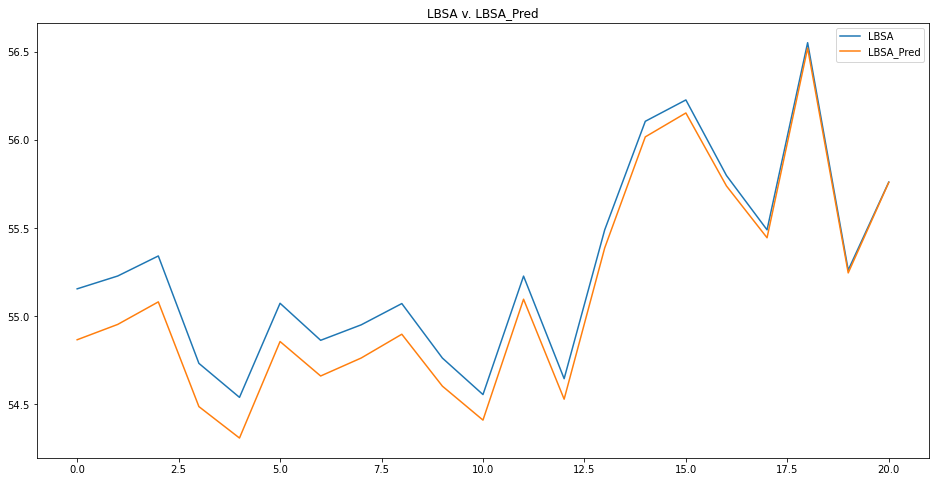

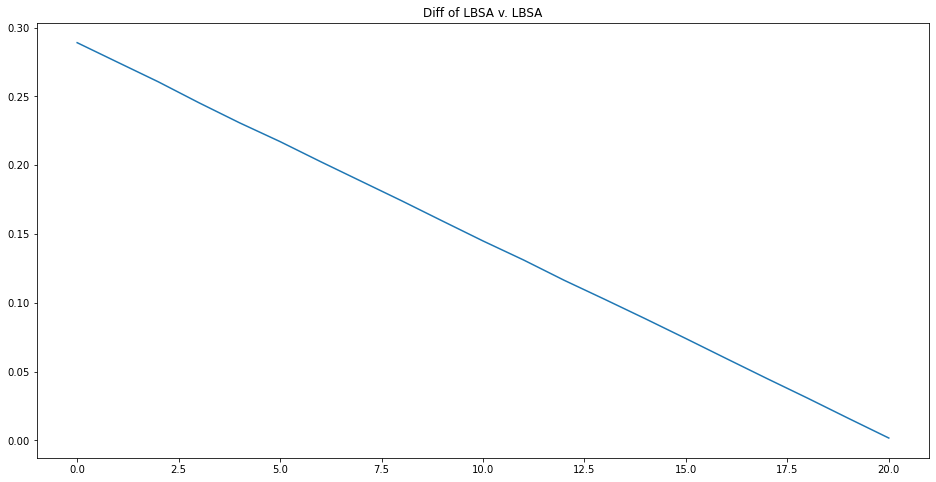

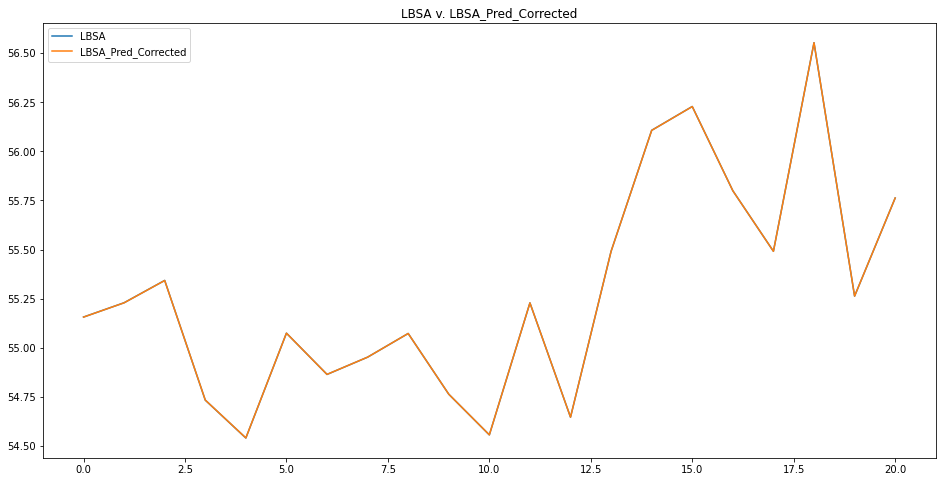

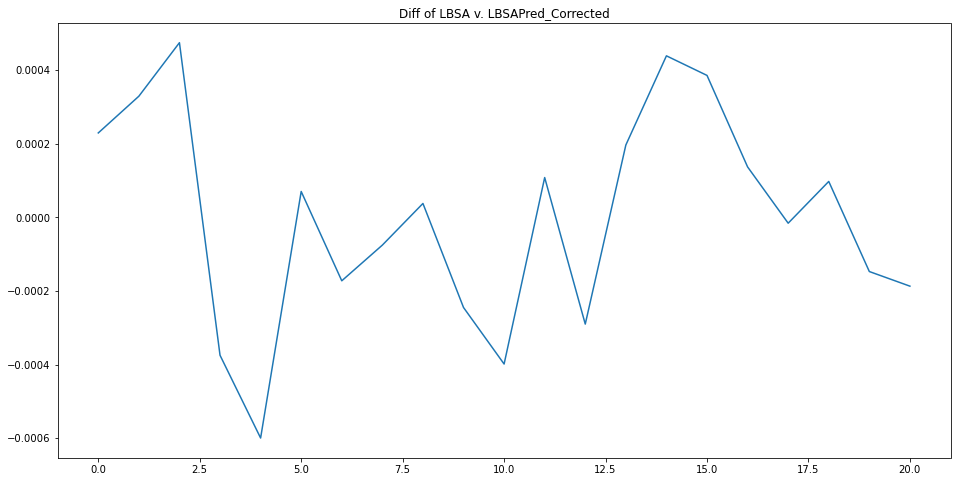

In [5]:
DAILY_INTEREST_RATE = ((1+0.02)**(252**-1))-1
FUTURE_SUFFIX = [chr(ord('A') + i) for i in range(14)]
FUTURE_CODE = ['LBS' + c for c in FUTURE_CODES]

DAILY_INTEREST_RATE = ((1+0.02)**(252**-1))-1
#
def futures_pricer(spot, expiry):
    return spot*(math.e ** (((DAILY_INTEREST_RATE)+(0.1/(spot))*(expiry))))

letters = [chr(i) for i in range(ord('A'),ord('O'))]
num = int(input("Contract Num (0-13)"))
cont_letter = letters[num]
Pred= []
count = 0 
expiry_day = 21*(num+1)
expiry_month_start = expiry_day-21
for spot in futures_2022['SBL']:
    if count < 21:
        expiry = expiry_day/252
        prediction = futures_pricer(spot, expiry)
        Pred.append(prediction)
        count += 1
    else:
        expiry = (252+ expiry_day - count)/252
        prediction = futures_pricer(spot, expiry)
        Pred.append(prediction)
        count += 1

#Contract v. Prediction
plt.figure(figsize=(16,8))
plt.plot(futures_2022['LBS'+cont_letter][:expiry_day], label = 'LBS'+cont_letter)
plt.plot(Pred[:expiry_day], label = 'LBS'+cont_letter+'_Pred')
plt.legend()
plt.title('LBS'+cont_letter+' v. LBS'+cont_letter+"_Pred")

#Difference Corrector & lin reg
plt.figure(figsize=(16,8))
plt.plot(futures_2022['LBS'+cont_letter][:expiry_day] - Pred[:expiry_day])
plt.title('Diff of LBS'+cont_letter+' v. LBS'+cont_letter)
difference = futures_2022['LBS'+cont_letter][:expiry_day] - Pred[:expiry_day]
if num <= 11:
    reg = scipy.stats.linregress(np.arange(start = 0, stop = expiry_day, step = 1), difference)
else:
    reg = scipy.stats.linregress(np.arange(start = 0, stop = 252, step = 1), difference)

    
print(f'line reg line for LBS{cont_letter}: {reg.intercept} + {reg.slope}x')
reg_ls = [reg.intercept+reg.slope*i for i in range(252)]
correct_pred = np.array(Pred[:expiry_day]) + np.array(reg_ls[:expiry_day])

#Plot predictions Corrected
plt.figure(figsize=(16,8))
plt.plot(futures_2022['LBS'+cont_letter][:expiry_day], label = 'LBS'+cont_letter)
plt.plot(correct_pred, label = 'LBS'+cont_letter+'_Pred_Corrected')
plt.legend()
plt.title('LBS'+cont_letter+' v. LBS'+cont_letter+"_Pred_Corrected")

#Plot Difference After Correction
plt.figure(figsize=(16,8))
plt.plot(futures_2022['LBS'+cont_letter][:expiry_day] - correct_pred)
plt.title('Diff of LBS'+cont_letter+' v. LBS'+cont_letter+"Pred_Corrected")

Correction Factors
line reg line for LBSA: 0.28879233138041943 + -0.014344824571183334(x)
line reg line for LBSB: 0.6023066202936028 + -0.01742281880526749(x)
line reg line for LBSC: 0.8747229246467849 + -0.01603930017915729(x)
line reg line for LBSD: 1.1543478486715124 + -0.015346389592722219(x)
line reg line for LBSE: 1.439323350349281 + -0.014980766538606423(x)
line reg line for LBSF: 1.7269722251729744 + -0.01474918508793019(x)
line reg line for LBSG: 2.0176883330792914 + -0.014615905960060582(x)
line reg line for LBSH: 2.310686575613605 + -0.014543274018779122(x)
line reg line for LBSI: 2.6038558941207475 + -0.014480841755721306(x)
line reg line for LBSJ: 2.896932431674776 + -0.01441989764077772(x)
line reg line for LBSK: 3.1904995109088903 + -0.014366250143628783(x)
line reg line for LBSL: 3.485096226619385 + -0.014324380781456666(x)
line reg line for LBSM: 3.7841457099191853 + -0.014331826875116666(x)
line reg line for LBSN: 4.08370669520336 + -0.014339285233264(x)
